In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import pandas as pd
import numpy as np

In [2]:
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

In [3]:
cra_color = 'darkorange'
nsc_color = 'dodgerblue'
eco_color = 'dimgrey'

In [4]:
df = pd.read_csv("Data/OSA_data/1IncidenceCost.csv")
df.head()

,IncidenceEOS,Cost,Categorical Risk Assessment,NSC,Enhanced Clinical Observation,QALY,Categorical Risk Assessment.1,NSC.1,Enhanced Clinical Observation.1,LY,Categorical Risk Assessment.2,NSC.2,Enhanced Clinical Observation.2,ICER ($/QALY),Categorical Risk Assessment.3,NSC.3,Enhanced Clinical Observation.3
0,0.10,NaN,206359.853124,205789.924997,205757.883109,NaN,29.076024,29.078950,29.080589,NaN,0.999995,0.999995,0.999995,NaN,Strongly Dominated (Baseline),Strongly Dominated,Cost Saving
1,0.49,NaN,206530.909826,205960.981699,205928.939811,NaN,29.075562,29.078488,29.080127,NaN,0.999980,0.999980,0.999980,NaN,Strongly Dominated (Baseline),Strongly Dominated,Cost Saving
2,0.88,NaN,206701.966528,206132.038401,206099.996513,NaN,29.075100,29.078026,29.079665,NaN,0.999965,0.999965,0.999965,NaN,Strongly Dominated (Baseline),Strongly Dominated,Cost Saving
3,1.27,NaN,206873.023230,206303.095103,206271.053215,NaN,29.074638,29.077564,29.079202,NaN,0.999950,0.999950,0.999950,NaN,Strongly Dominated (Baseline),Strongly Dominated,Cost Saving
4,1.66,NaN,207044.079932,206474.151805,206442.109917,NaN,29.074176,29.077101,29.078740,NaN,0.999935,0.999935,0.999935,NaN,Strongly Dominated (Baseline),Strongly Dominated,Cost Saving


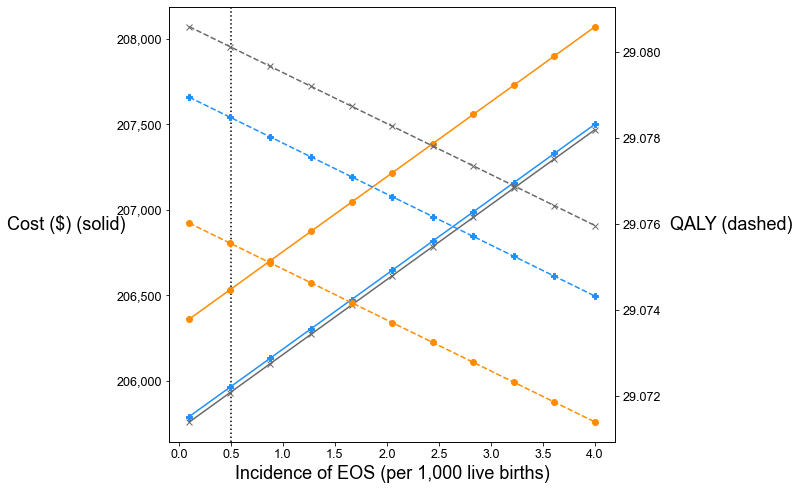

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
plt.axvline(x=0.5, color='black', linestyle='dotted', label='_Base Case Incidence')
    
ax2 = ax.twinx()
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(df["IncidenceEOS"], df["Categorical Risk Assessment"], color=cra_color, marker='o', label="_CRA")
ax.plot(df["IncidenceEOS"], df["NSC"], color=nsc_color, marker='P', label="_NSC")
ax.plot(df["IncidenceEOS"], df["Enhanced Clinical Observation"], color=eco_color, marker='x', label="_ECO")
ax.set_xlabel("Incidence of EOS (per 1,000 live births)")
ax.set_ylabel("Cost ($) (solid)", rotation=0, labelpad=50, va="center")
ax2.plot(df["IncidenceEOS"], df["Categorical Risk Assessment.1"], color=cra_color, marker='o', linestyle='dashed')
ax2.plot(df["IncidenceEOS"], df["NSC.1"], color=nsc_color, marker='P', linestyle='dashed')
ax2.plot(df["IncidenceEOS"], df["Enhanced Clinical Observation.1"], color=eco_color, marker='x', linestyle='dashed')
ax2.set_ylabel("QALY (dashed)", rotation=0, labelpad=70, va="center")
#ax2.set_ylim(bottom=30.88, top=30.92)
#ax.legend()
plt.show()